In [1]:
import numpy as np
import pylab as plt
import networkx as nx
import pandas as pd

In [2]:
edge_list = [(0, 2), (0, 1), (0, 3), (2, 4), (5, 6), (7, 4), (0, 6), (5, 3), (3, 7), (0, 8)]

In [3]:
goal = 7

In [4]:
G = nx.Graph()
G.add_edges_from(edge_list)

In [5]:
position = nx.spring_layout(G)

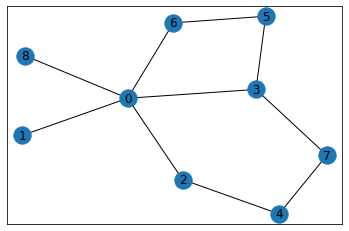

In [6]:
nx.draw_networkx_nodes(G, position)
nx.draw_networkx_edges(G, position)
nx.draw_networkx_labels(G, position)
plt.show()

In [7]:
SIZE_MATRIX = 9

In [8]:
R = np.matrix(np.ones(shape=(SIZE_MATRIX, SIZE_MATRIX)))
R *= -1

In [9]:
for edge in edge_list:
    print(edge)
    # undirected grapf
    if edge[1] == goal:
        R[edge] = 100
    else:
        R[edge] = 0
    if edge[0] == goal:
        R[edge[::-1]] = 100
    else:
        R[edge[::-1]] = 0

(0, 2)
(0, 1)
(0, 3)
(2, 4)
(5, 6)
(7, 4)
(0, 6)
(5, 3)
(3, 7)
(0, 8)


In [10]:
R[goal, goal] = 100

In [11]:
R

matrix([[ -1.,   0.,   0.,   0.,  -1.,  -1.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,   0.,   0.,  -1.,  -1., 100.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [13]:
gamma = 0.8

In [14]:
Q = np.matrix(np.zeros([SIZE_MATRIX, SIZE_MATRIX]))

In [15]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def get_available_actions(state):
    current_state_now = R[state,]
    available_actions = np.where(current_state_now >= 0)[1]
    
    return available_actions

In [17]:
def sample_next_action(available_actions):
    next_action = int(np.random.choice(available_actions, size=1))
    
    return next_action

In [18]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    # print('max_index', max_index.shape)
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    
    max_value = Q[action, max_index]
    
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    
    # print('max_value', R[current_state, action] + gamma * max_value)

In [19]:
initial_state = 0

In [20]:
available_actions = get_available_actions(initial_state)
print(available_actions)

[1 2 3 6 8]


In [21]:
action = sample_next_action(available_actions)
print(action)

8


In [22]:
update(initial_state, action, gamma)

In [23]:
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    
    available_action = get_available_actions(current_state)
    action = sample_next_action(available_action)
    
    update(current_state, action, gamma)

In [24]:
print("Trained Q matrix: ")
pd.DataFrame(Q)

Trained Q matrix: 


,0,1,2,3,4,5,6,7,8
0,0.000000,255.934569,319.687999,399.897764,0.000000,0.000000,255.750400,0.000000,255.7504
1,319.918211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
2,319.687999,0.000000,0.000000,0.000000,399.934569,0.000000,0.000000,0.000000,0.0000
3,319.687999,0.000000,0.000000,0.000000,0.000000,319.918211,0.000000,499.872205,0.0000
4,0.000000,0.000000,319.687999,0.000000,0.000000,0.000000,0.000000,499.918211,0.0000
5,0.000000,0.000000,0.000000,399.897764,0.000000,0.000000,255.934569,0.000000,0.0000
6,319.687999,0.000000,0.000000,0.000000,0.000000,319.918211,0.000000,0.000000,0.0000
7,0.000000,0.000000,0.000000,399.897764,399.609999,0.000000,0.000000,499.897764,0.0000
8,319.918211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000


In [25]:
print("Normalized Q matrix: ")
pd.DataFrame(Q / np.max(Q) * 100)

Normalized Q matrix: 


,0,1,2,3,4,5,6,7,8
0,0.00000,51.195288,63.94806,79.992638,0.000000,0.00000,51.158448,0.000000,51.158448
1,63.99411,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2,63.94806,0.000000,0.00000,0.000000,80.000000,0.00000,0.000000,0.000000,0.000000
3,63.94806,0.000000,0.00000,0.000000,0.000000,63.99411,0.000000,99.990797,0.000000
4,0.00000,0.000000,63.94806,0.000000,0.000000,0.00000,0.000000,100.000000,0.000000
5,0.00000,0.000000,0.00000,79.992638,0.000000,0.00000,51.195288,0.000000,0.000000
6,63.94806,0.000000,0.00000,0.000000,0.000000,63.99411,0.000000,0.000000,0.000000
7,0.00000,0.000000,0.00000,79.992638,79.935076,0.00000,0.000000,99.995910,0.000000
8,63.99411,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [26]:
current_state = 0
steps = [current_state]

In [27]:
while current_state != 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

In [28]:
print("Most efficient path: ")
print(steps)

Most efficient path: 
[0, 3, 7]
